# Exploring data

In [84]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

from sklearn.datasets import samples_generator as sg
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [14]:
filenames = glob.glob('../data/Raw/*.csv')

In [5]:
jnk = pd.read_csv('../data/Raw/Jnk.csv', sep = ';')

In [6]:
jnk.head()

,CauseGene,EffectGene,Replicate,Treatment,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,...,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
0,MAPK10,A1BG,1,BCR,0.333,0.280284,0.372051,0.824172,-0.746940,0.472452,...,-1.508746,0.077473,-0.044090,-0.349988,-0.122733,-0.027860,1.066276,0.106499,-1.334779,0.580358
1,MAPK10,A1BG,1,CD40,0.333,0.280284,0.671412,0.779907,-0.366185,1.063347,...,-0.902298,0.077473,0.255573,0.825101,-2.091418,0.986115,0.020539,0.666451,-0.667305,0.313519
2,MAPK10,A1BG,2,BCR,0.333,0.961877,-0.165013,0.312029,1.250839,1.127154,...,-0.409536,-0.670996,0.537398,0.592462,0.456636,-0.244272,-1.993159,0.945375,0.301992,1.030175
3,MAPK10,A1BG,2,CD40,0.333,0.961877,0.449106,0.607056,-0.655400,0.438219,...,-1.283292,-0.670996,1.808573,-1.767904,-0.623801,-0.330098,1.473550,-0.284614,-1.346430,0.232617
4,MAPK10,A1BG,3,BCR,0.333,0.192576,-2.127241,0.919851,0.559836,0.263217,...,-2.190987,1.650800,0.196474,-0.110119,-1.663191,0.131282,-0.023995,-0.201010,1.363202,1.410923


In [7]:
jnk.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000
mean,2.000000,0.626692,-0.601038,-0.407198,0.407461,-0.296367,0.502647,0.269170,-0.327822,0.167640,-0.049654,-0.010104,0.048604,0.031054,-0.050262,-0.056626,-0.085797,0.013403,-0.023786,0.058731
std,0.816498,0.306825,1.033680,1.120821,0.697801,0.815511,0.686595,0.587064,1.038683,0.646049,1.029106,0.928220,1.155254,0.744933,1.004501,0.889811,0.848212,1.048609,1.076631,1.060814
min,1.000000,0.000000,-2.631707,-2.543696,-1.335505,-1.955696,-1.441579,-1.274366,-3.209102,-0.863610,-2.190987,-3.503078,-5.929185,-3.459456,-5.000662,-3.744604,-3.714958,-4.662230,-4.882397,-4.246056
25%,1.000000,0.395000,-1.159572,-1.211629,0.012916,-0.873302,0.274701,0.119731,-0.762814,-0.564831,-0.902298,-0.638302,-0.710063,-0.470031,-0.699634,-0.650075,-0.665318,-0.586267,-0.685528,-0.624116
50%,2.000000,0.708000,-0.478551,-0.383387,0.486017,-0.338879,0.484302,0.515033,0.086155,0.332097,0.129951,-0.010876,-0.013368,0.039907,-0.069593,-0.048745,-0.094251,0.026663,-0.013353,0.062201
75%,3.000000,0.901000,0.192576,0.615612,0.779907,0.559836,1.026100,0.639836,0.347268,0.719931,0.725785,0.618415,0.713972,0.550994,0.576469,0.537341,0.488391,0.642192,0.676552,0.762480
max,3.000000,1.000000,0.961877,1.407778,2.204756,1.250839,1.579575,1.029752,0.937734,1.060185,1.571902,3.722801,5.558763,3.636107,4.744695,4.119485,3.755805,5.130988,4.466281,4.002814


In [10]:
jnk = jnk[jnk['Pvalue']<0.05]

In [11]:
jnk.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,17352.00000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000
mean,2.00000,0.018808,-0.601038,-0.407198,0.407461,-0.296367,0.502647,0.269170,-0.327822,0.167640,-0.049654,-0.002210,-0.024858,0.166680,-0.174200,0.004068,-0.070316,-0.113851,-0.124755,0.091156
std,0.81652,0.015853,1.033708,1.120851,0.697820,0.815534,0.686614,0.587080,1.038711,0.646066,1.029134,0.890813,1.153890,0.667830,0.914903,0.849925,0.819210,1.057324,1.080449,1.163270
min,1.00000,0.000000,-2.631707,-2.543696,-1.335505,-1.955696,-1.441579,-1.274366,-3.209102,-0.863610,-2.190987,-2.680771,-4.354142,-2.332041,-4.030996,-3.614005,-2.850077,-4.568499,-4.678770,-3.829776
25%,1.00000,0.003000,-1.159572,-1.211629,0.012916,-0.873302,0.274701,0.119731,-0.762814,-0.564831,-0.902298,-0.627184,-0.795909,-0.301882,-0.747983,-0.567201,-0.631714,-0.686014,-0.824872,-0.677076
50%,2.00000,0.016000,-0.478551,-0.383387,0.486017,-0.338879,0.484302,0.515033,0.086155,0.332097,0.129951,0.045217,-0.036840,0.191630,-0.132039,0.027444,-0.058329,-0.023408,-0.107459,0.132556
75%,3.00000,0.032000,0.192576,0.615612,0.779907,0.559836,1.026100,0.639836,0.347268,0.719931,0.725785,0.651080,0.651294,0.652445,0.425285,0.595945,0.499994,0.585632,0.599559,0.906878
max,3.00000,0.049000,0.961877,1.407778,2.204756,1.250839,1.579575,1.029752,0.937734,1.060185,1.571902,2.768114,4.830095,2.635608,3.152570,3.669921,2.567011,3.331574,3.762194,3.507158


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793e8f57b8>]], dtype=object)

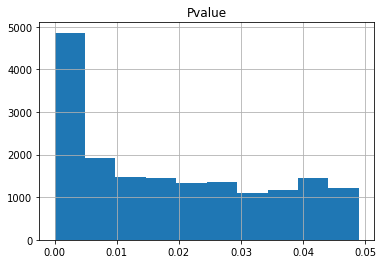

In [13]:
jnk.hist(column='Pvalue')

In [15]:
dataframes = list()
for fn in filenames:
    df = pd.read_csv(fn, sep=';')
    df = df[df['Pvalue']<=0.05]
    dataframes.append(df)
positive_dataframe = pd.concat(dataframes)

In [16]:
positive_dataframe.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000
mean,2.000000,0.019645,-0.253771,-0.202387,0.237065,-0.030130,0.309775,0.245870,-0.047036,-0.043730,-0.338348,-0.019392,-0.053014,0.132500,-0.165013,-0.018789,-0.046205,-0.051292,-0.062585,0.093309
std,0.816505,0.015716,1.011777,1.057047,0.834457,0.772179,0.676408,0.838084,1.169437,1.142481,1.091722,0.886477,1.128808,0.681705,0.926512,0.856733,0.828177,1.056030,1.108952,1.162122
min,1.000000,0.000000,-2.631707,-3.544150,-1.335505,-1.955696,-2.063257,-1.816556,-3.209102,-4.137415,-3.052723,-3.039448,-5.929185,-2.904567,-4.717788,-3.614005,-3.362663,-4.568499,-4.758669,-3.942327
25%,1.000000,0.005000,-1.036627,-0.995702,-0.754216,-0.655400,0.124721,0.004234,-0.767711,-0.772534,-1.301564,-0.634648,-0.794210,-0.352894,-0.744085,-0.590349,-0.621823,-0.625828,-0.774407,-0.670456
50%,2.000000,0.018000,-0.037189,0.157753,0.588019,0.048357,0.428794,0.440224,0.204090,0.311223,-0.245521,0.014760,-0.070988,0.149291,-0.138684,-0.002650,-0.042009,0.025042,-0.044802,0.132647
75%,3.000000,0.033000,0.777138,0.621560,0.896329,0.559836,0.766409,0.645177,0.793997,0.719931,0.455181,0.611621,0.614262,0.628252,0.429909,0.566513,0.537708,0.650343,0.690229,0.910642
max,3.000000,0.050000,1.570461,1.559381,2.204756,2.682876,1.579575,1.806298,1.759773,2.643628,2.737891,3.111687,5.319324,2.635608,3.846770,3.887316,3.636223,4.085083,4.010764,3.884514


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793ddb5f98>]], dtype=object)

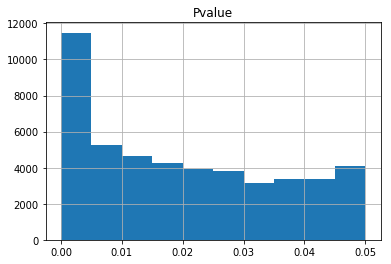

In [17]:
positive_dataframe.hist(column='Pvalue')

In [18]:
sample = positive_dataframe.sample(frac=0.01, replace=True)

In [79]:
len(sample.columns)

23

In [73]:
sample.columns

Index(['CauseGene', 'EffectGene', 'Replicate', 'Treatment', 'Pvalue',
       '0min_neg_cause', '15min_cause', '30min_cause', '90min_cause',
       '120min_cause', '180min_cause', '210min_cause', '240min_cause',
       '360min_cause', '0min_neg_effect', '15min_effect', '30min_effect',
       '90min_effect', '120min_effect', '180min_effect', '210min_effect',
       '240min_effect', '360min_effect'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793ddb4e10>]], dtype=object)

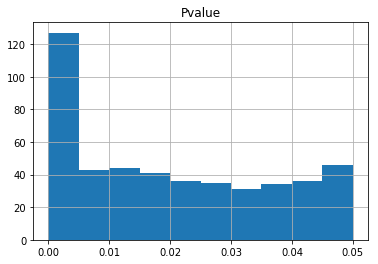

In [19]:
sample.hist(column='Pvalue')

In [90]:
scaler = MinMaxScaler()
scaler.fit(sample.iloc[:,5:])
plotdata = scaler.transform(sample.iloc[:,5:])*2-1

array([[ 0.47903493,  1.        ,  0.28107941, ...,  0.63333433,
        -0.03077271,  0.4934333 ],
       [ 0.38594683,  0.53470284,  0.22006669, ...,  0.30596889,
        -0.06905322,  0.09273346],
       [ 0.64293541,  0.58964007,  0.2755156 , ..., -0.2834054 ,
         0.31081024,  0.31628054],
       ..., 
       [ 0.64033105, -0.18082868,  0.14441202, ...,  0.0024543 ,
         0.48384636, -0.08729654],
       [ 0.34420293, -0.44473378,  0.27411841, ..., -0.06728404,
         0.25874545,  0.20158834],
       [-1.        , -0.32789309,  0.05464167, ...,  0.29913875,
         0.52965546,  0.26806417]])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


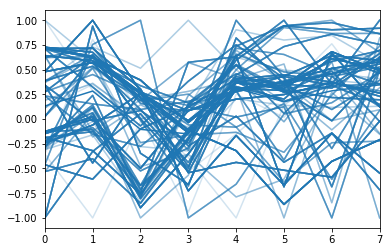

In [93]:
sns.tsplot(data=plotdata[:,0:8],err_style="unit_traces")

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


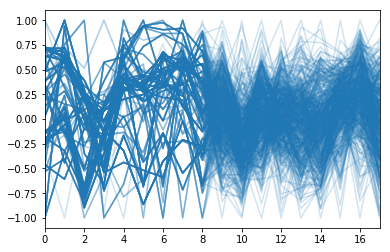

In [96]:
sns.tsplot(data=plotdata[:,:],err_style="unit_traces")

In [ ]:
scaler = MinMaxScaler()